In [4]:
from math import *
from matplotlib import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import quad
#%pylab inline
%matplotlib inline

In [5]:
def norm(k, N): return math.gamma(N+2)/math.gamma(k+2)/math.gamma(N-k+2)
def prob(e, k, N): return norm(k,N)*pow(e, k)*pow(1-e, N-k)
def prob_k0(e, N): return pow(e, 0)*pow(1-e, N)

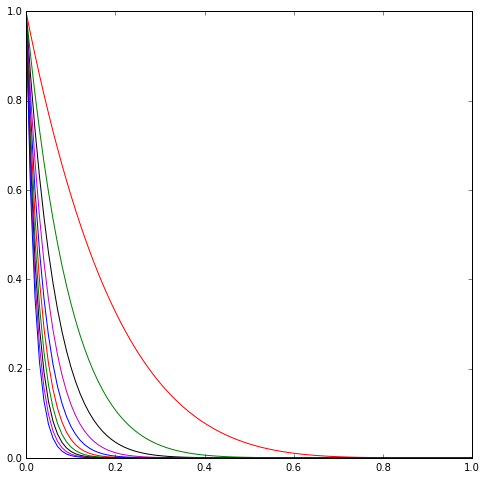

In [7]:
x = np.linspace(0.0,1.0,100)
y_probs = []
NN = 50
for ii in range(0, NN+1): 
    #if ii % (NN/10) == 0 and ii != 0 and ii != NN:
    #if ii == 0:
    if ii % (NN/10) == 0:
        y_probs.append( map(lambda xx: prob_k0(xx, ii), x))
fig, ax = plt.subplots(figsize=(8,8))
col = ['b', 'r', 'g', 'k', 'm']
for i, y_prob in enumerate(y_probs): 
    ax.plot(x, y_prob, col[i%5])
    #ax.set_yscale("log", nonposy='clip')
    #ax.set_xscale("log", nonposy='clip')
plt.show()

In [51]:
#Nsim = 214780
#Nsim = 570751
xx = np.linspace(0.0,1.0,10000000)
def upper_limit(Nsim_sig=5652, Nsim_bg=214780, CL=0.9):
    yy = map(lambda arg: prob_k0(arg, Nsim_bg), xx)
    #print yy
    tot = reduce(lambda x,y: x+y, yy)
    #print "tot=%f" % tot
    acc = 0;
    res = 0;
    for i, y in enumerate(yy):
        acc += y
        frac = acc/tot
        #print "x=%.5e, y==%f, acc=%f, tot=%f, frac=%f" % (xx[i], y, acc, tot, frac)    
        if frac > 0.9:
            #print "x=%.5e, y==%f, acc=%f, tot=%f, frac=%f" % (xx[i], y, acc, tot, frac)
            res = xx[i]
            break

    print "Rej= %f" % (1./res)
    return Nsim_sig/(Nsim_bg*res);

NNsim_bg_vals = [214780, 570751]
NNsim_sig = 5652
for NNsim_bg in NNsim_bg_vals:
    print "S/B Upper Limit 90%% CL (Nsim_bg=%d) = %f" % (NNsim_bg, upper_limit(NNsim_sig, NNsim_bg, 0.9))

Rej= 93457.934579
S/B Upper Limit 90% CL (Nsim_bg=214780) = 2459.373528
Rej= 249999.975000
S/B Upper Limit 90% CL (Nsim_bg=570751) = 2475.685297
